In [1]:
import requests, zipfile, io
import sys, os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Download Data
import requests, zipfile, io

In [2]:

r = requests.get("http://images.cocodataset.org/annotations/annotations_trainval2017.zip")
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall("/content")
my_path = '/content/annotations'
sys.path.append(my_path)

In [3]:
with open("/content/annotations/instances_train2017.json", 'r') as f:
    json_data = json.load(f)

In [4]:
json_data.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [18]:
print('Annotations Data Size', len(json_data['annotations']))
print('Images Data Size', len(json_data['images']))
print('number of classes', len(json_data['categories']))

Annotations Data Size 860001
Images Data Size 118287
number of classes 80


In [7]:
anno_df = pd.DataFrame(json_data['annotations'], columns = json_data['annotations'][0].keys())
img_df = pd.DataFrame(json_data['images'], columns = json_data['images'][0].keys())
category_df = pd.DataFrame(json_data['categories'], columns = json_data['categories'][0].keys())[['id', 'name']]
anno_df.head()

segmentation  ...    id
0  [[239.97, 260.24, 222.04, 270.49, 199.84, 253....  ...   156
1  [[247.71, 354.7, 253.49, 346.99, 276.63, 337.3...  ...   509
2  [[274.58, 405.68, 298.32, 405.68, 302.45, 402....  ...   603
3  [[296.65, 388.33, 296.65, 388.33, 297.68, 388....  ...   918
4  [[251.87, 356.13, 260.13, 343.74, 300.39, 335....  ...  1072

[5 rows x 7 columns]

In [8]:
img_df.head()

license  ...      id
0        3  ...  391895
1        4  ...  522418
2        3  ...  184613
3        3  ...  318219
4        3  ...  554625

[5 rows x 8 columns]

In [ ]:
cols_needed = ['file_name', 'height', 'width', 'category_id', 'bbox', 'name']

# get image name and dimensions from image dataframe
anno_df = pd.merge(anno_df, img_df[['file_name', 'height', 'width', 'id']], left_on='image_id', right_on = 'id', how='left')

# merge the category name to the annotations data
anno_df = pd.merge(anno_df, category_df, how='left', left_on='category_id', right_on='id')[cols_needed]
anno_df.head(10)

file_name  height  ...                              bbox     name
0  000000558840.jpg     427  ...    [199.84, 200.46, 77.71, 70.88]  hot dog
1  000000200365.jpg     480  ...   [234.22, 317.11, 149.39, 38.55]  hot dog
2  000000200365.jpg     480  ...    [239.48, 347.87, 160.0, 57.81]  hot dog
3  000000200365.jpg     480  ...       [296.65, 388.33, 1.03, 0.0]  hot dog
4  000000200365.jpg     480  ...   [251.87, 333.42, 125.94, 22.71]  hot dog
5  000000495357.jpg     479  ...    [337.02, 244.46, 66.47, 66.75]      dog
6  000000116061.jpg     375  ...    [213.81, 192.39, 53.94, 70.28]      dog
7  000000016164.jpg     486  ...  [324.66, 247.92, 250.87, 181.02]      dog
8  000000205350.jpg     640  ...     [260.18, 252.76, 67.91, 53.3]      dog
9  000000000074.jpg     426  ...   [61.87, 276.25, 296.42, 103.18]      dog

[10 rows x 6 columns]

In [ ]:
anno_df['category_id'].value_counts()

1     262465
3      43867
62     38491
84     24715
44     24342
       ...  
87      1481
23      1294
14      1285
80       225
89       198
Name: category_id, Length: 80, dtype: int64

In [ ]:
category_df

id        name
0    1      person
1    2     bicycle
2    3         car
3    4  motorcycle
4    5    airplane
..  ..         ...
75  86        vase
76  87    scissors
77  88  teddy bear
78  89  hair drier
79  90  toothbrush

[80 rows x 2 columns]

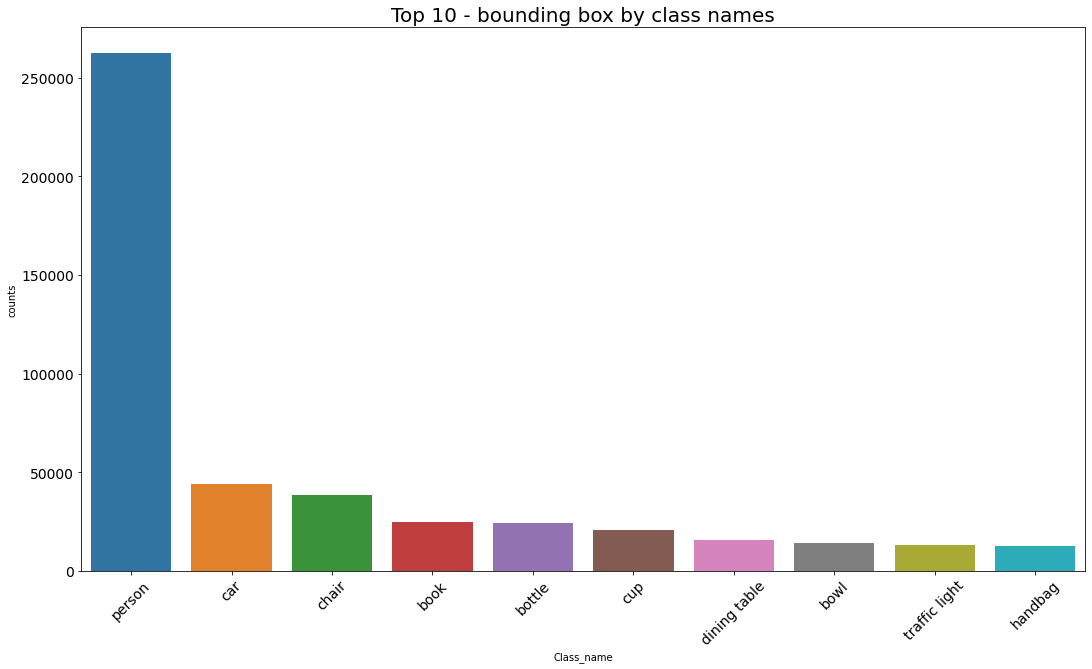

In [ ]:
_temp = pd.DataFrame(anno_df.name.value_counts()).reset_index()
_temp.columns = ['Class_name', 'counts']


top = 10
plt.figure(figsize=(18,10))
sns.barplot(x ='Class_name', y='counts', data=_temp.head(top))
plt.xticks(rotation=45)
plt.xticks(size=14)
plt.yticks(size=14)
plt.title('Top 10 - bounding box by class names', size=20);

In [ ]:
_temp

Class_name  counts
0          person  262465
1             car   43867
2           chair   38491
3            book   24715
4          bottle   24342
..            ...     ...
75       scissors    1481
76           bear    1294
77  parking meter    1285
78        toaster     225
79     hair drier     198

[80 rows x 2 columns]

In [ ]:
anno_df.head()

file_name  height  ...                             bbox     name
0  000000558840.jpg     427  ...   [199.84, 200.46, 77.71, 70.88]  hot dog
1  000000200365.jpg     480  ...  [234.22, 317.11, 149.39, 38.55]  hot dog
2  000000200365.jpg     480  ...   [239.48, 347.87, 160.0, 57.81]  hot dog
3  000000200365.jpg     480  ...      [296.65, 388.33, 1.03, 0.0]  hot dog
4  000000200365.jpg     480  ...  [251.87, 333.42, 125.94, 22.71]  hot dog

[5 rows x 6 columns]

In [ ]:
# Extract the dimensions from bounding box
x = []
y = []
b_w = []
b_h = []

bbox_list = anno_df['bbox']
for i in bbox_list:
  x.append(i[0])
  y.append(i[1])
  b_w.append(i[2])
  b_h.append(i[3])

anno_df['x'] = x
anno_df['y'] = y
anno_df['b_w'] = b_w
anno_df['b_h'] = b_h

anno_cluster = anno_df[['file_name', 'width','height', 'x', 'y', 'b_w', 'b_h']]
anno_cluster.head()

file_name  width  height       x       y     b_w    b_h
0  000000558840.jpg    640     427  199.84  200.46   77.71  70.88
1  000000200365.jpg    640     480  234.22  317.11  149.39  38.55
2  000000200365.jpg    640     480  239.48  347.87  160.00  57.81
3  000000200365.jpg    640     480  296.65  388.33    1.03   0.00
4  000000200365.jpg    640     480  251.87  333.42  125.94  22.71

In [ ]:
anno_cluster['x'] = anno_cluster['x']/anno_cluster['width']
anno_cluster['y'] = anno_cluster['y']/anno_cluster['height']
anno_cluster['b_w'] = anno_cluster['b_w']/anno_cluster['width']
anno_cluster['b_h'] = anno_cluster['b_h']/anno_cluster['height']
anno_cluster.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

file_name  width  height         x         y       b_w       b_h
0  000000558840.jpg    640     427  0.312250  0.469461  0.121422  0.165995
1  000000200365.jpg    640     480  0.365969  0.660646  0.233422  0.080312
2  000000200365.jpg    640     480  0.374188  0.724729  0.250000  0.120438
3  000000200365.jpg    640     480  0.463516  0.809021  0.001609  0.000000
4  000000200365.jpg    640     480  0.393547  0.694625  0.196781  0.047313

In [ ]:
anno_cluster = anno_cluster.dropna()
hw_array = anno_cluster[["b_w", "b_h"]].to_numpy()

In [ ]:
hw_array.shape

(860001, 2)

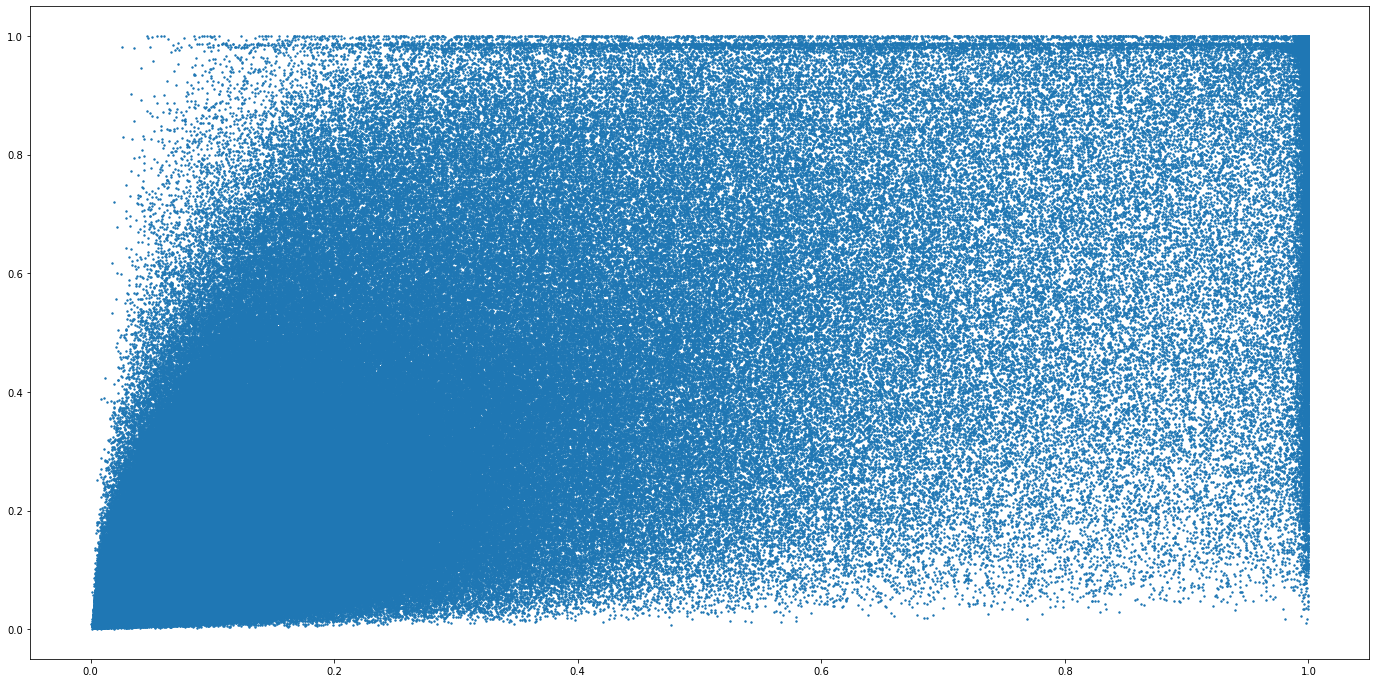

In [ ]:
plt.figure(figsize=(24,12))
plt.scatter(hw_array[:,0], hw_array[:,1], marker='o', s=2)
# plt.xscale('log')
# plt.yscale('log')


In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(hw_array)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

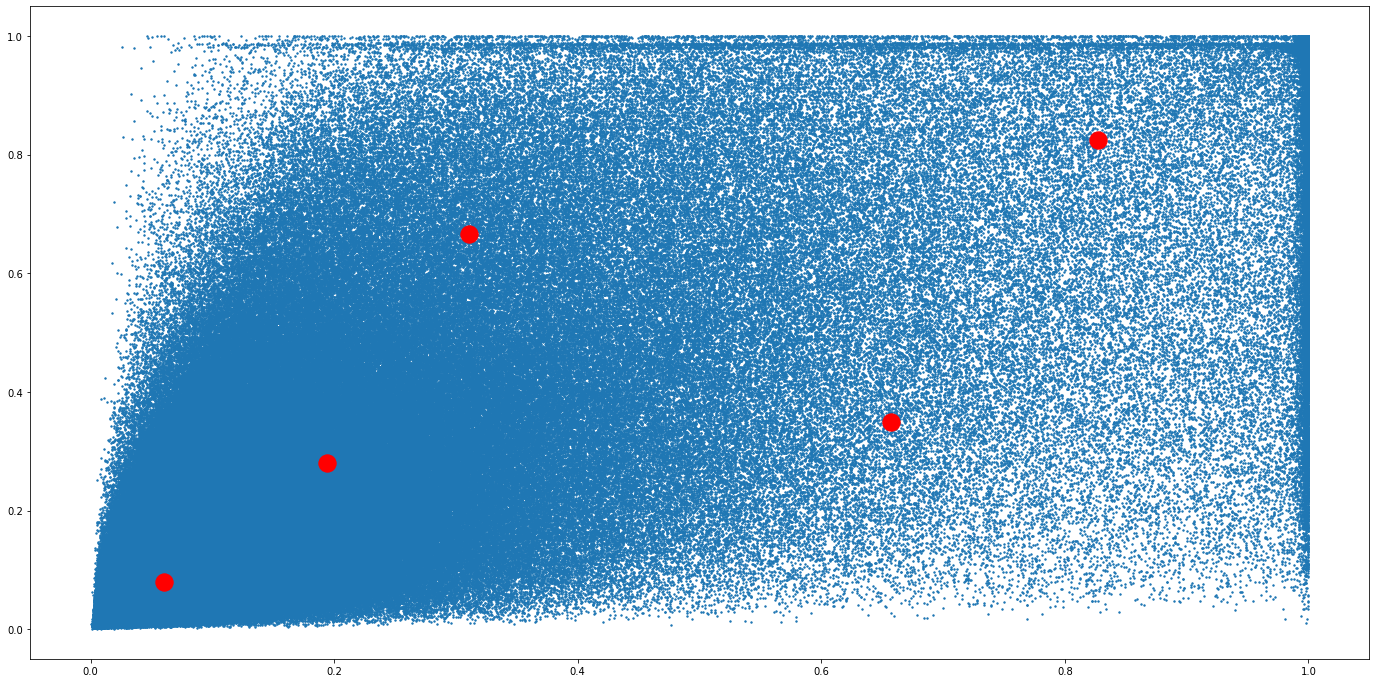

In [ ]:
#Determine the optimal number of clusters
plt.figure(figsize=(24,12))
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1], marker='o', s=2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

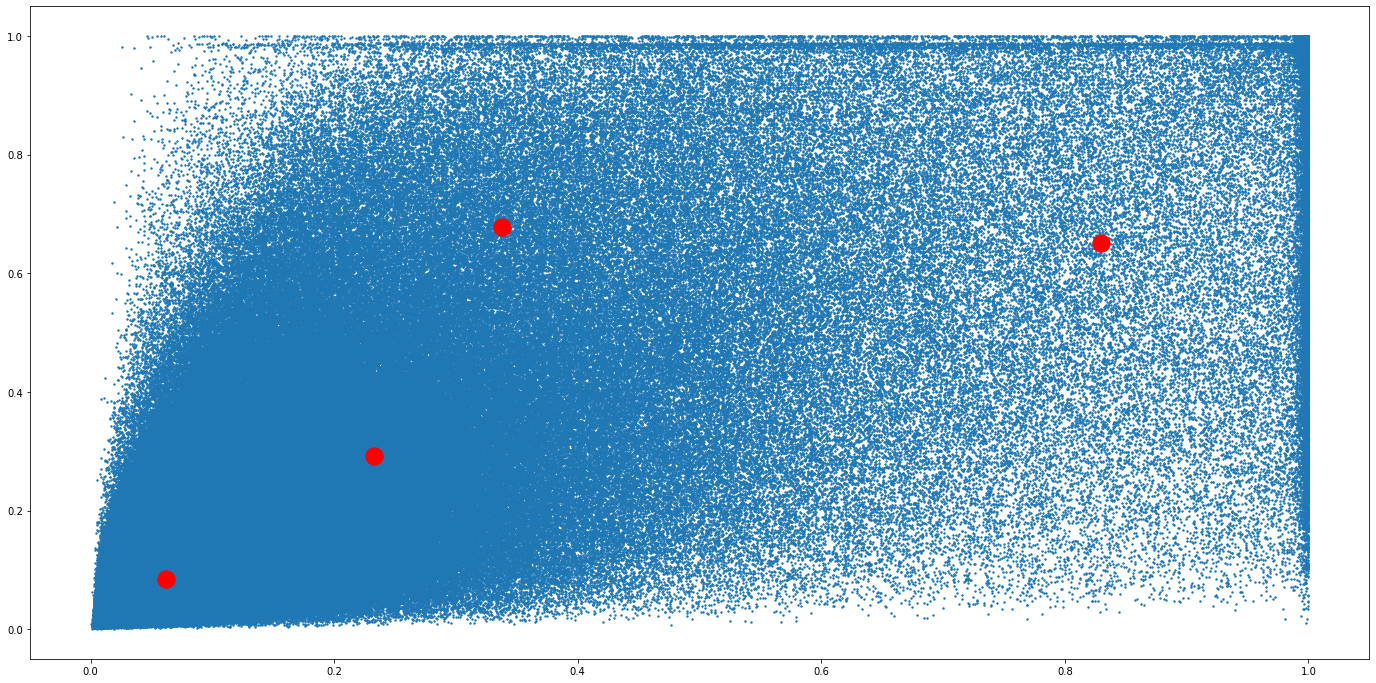

In [ ]:
#Determine the optimal number of clusters
plt.figure(figsize=(24,12))
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1], marker='o', s=2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

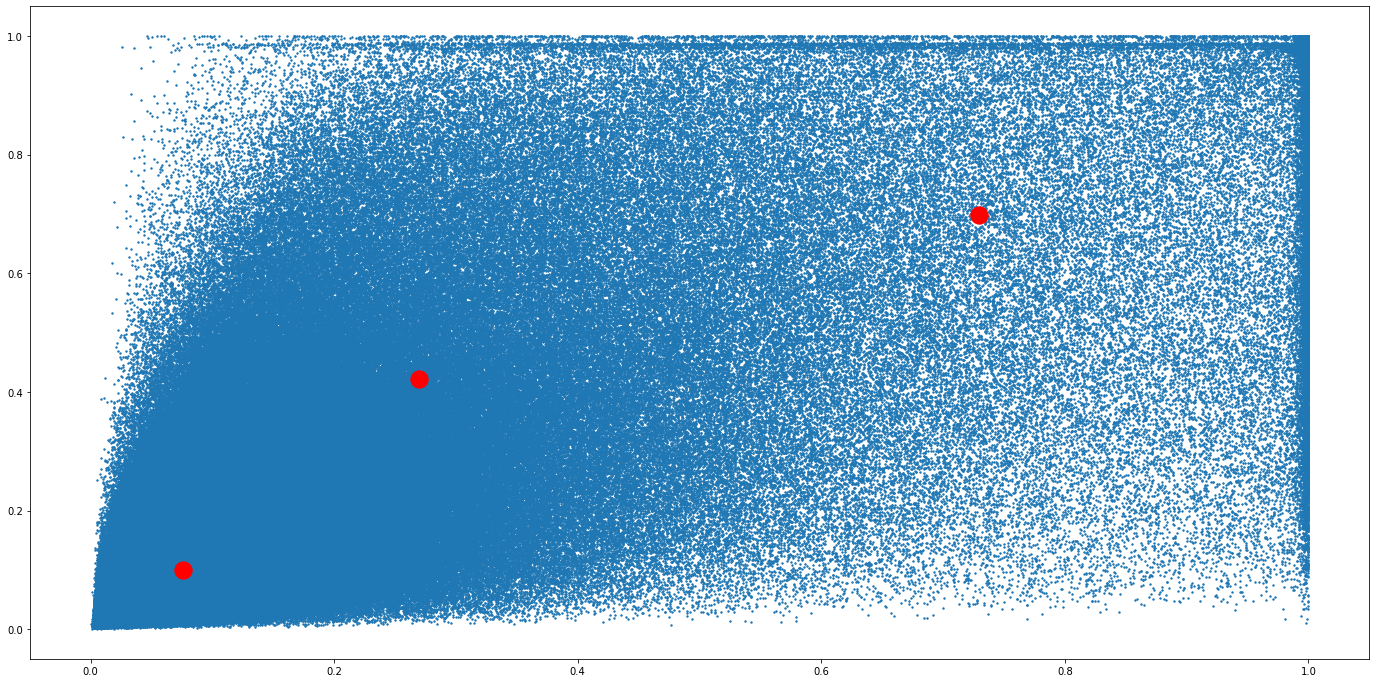

In [ ]:
#Determine the optimal number of clusters
plt.figure(figsize=(24,12))
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1], marker='o', s=2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

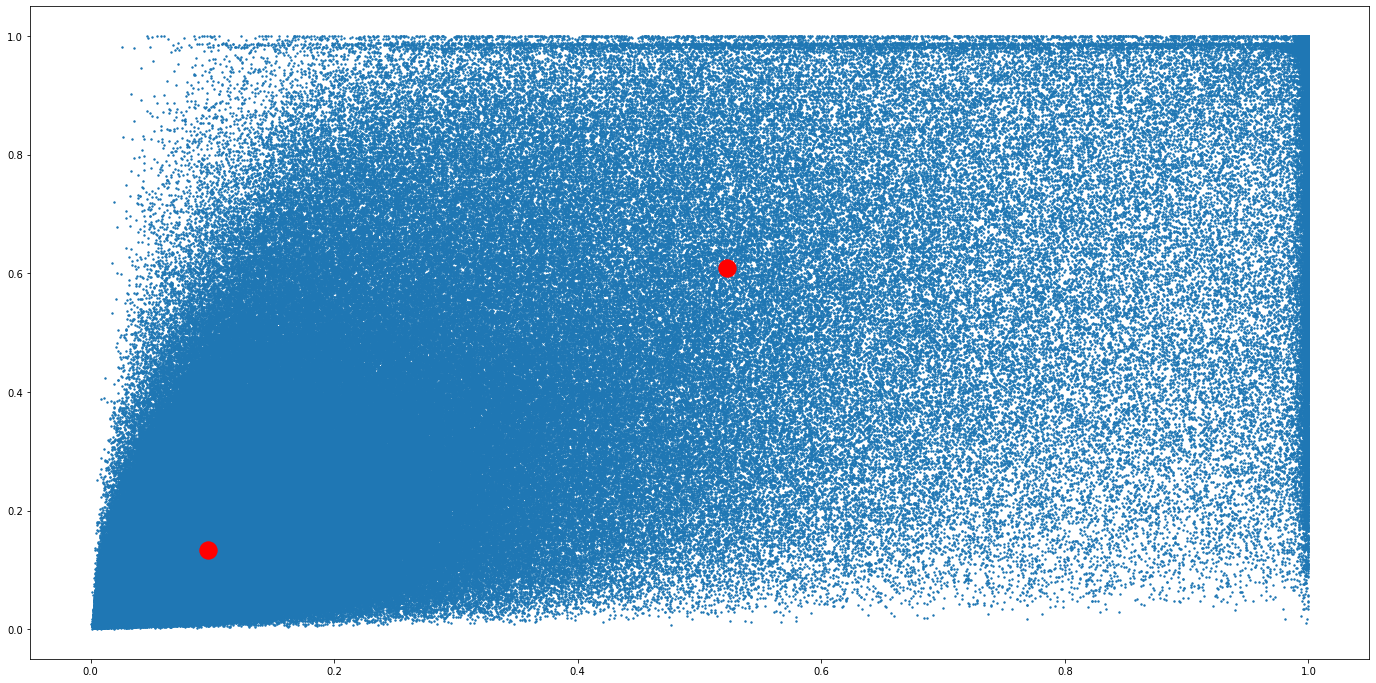

In [ ]:
#Determine the optimal number of clusters
plt.figure(figsize=(24,12))
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(hw_array)
plt.scatter(hw_array[:,0], hw_array[:,1], marker='o', s=2)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()